# 1. Import Dependencies

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Check the coordinates

In [2]:
df_bench = pd.read_csv('./labeling/benchpress_coords_merged.csv')
df_dead = pd.read_csv('./labeling/deadlift_coords_merged.csv')
df_squat = pd.read_csv('./labeling/squat_coords_merged.csv')

In [3]:
df_bench.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139
3,b_correct,0.342315,0.286979,0.466467,0.999992,0.325819,0.285868,0.529371,0.999994,0.325422,...,-0.635539,0.980626,0.981234,0.604804,-0.016468,0.940290,0.719281,0.736312,-0.785139,0.994317
4,b_correct,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,-0.825383,0.985708,0.987015,0.609234,-0.114778,0.966898,0.723577,0.738962,-0.948455,0.994775


In [4]:
df_dead.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,d_correct,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.491055,0.909689,0.588401,0.644509,0.169380,0.901291,0.728158,0.618136,0.480577,0.840292
1,d_correct,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.409666,0.857568,0.582093,0.645119,0.139664,0.876760,0.694696,0.614433,0.398222,0.798012
2,d_correct,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.369821,0.913276,0.565828,0.635022,0.151700,0.870137,0.743687,0.628615,0.331195,0.832618
3,d_correct,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.370875,0.964271,0.582262,0.644630,0.042322,0.923103,0.750335,0.640705,0.323895,0.838903
4,d_correct,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.414867,0.955359,0.579698,0.642973,0.006126,0.938232,0.745315,0.636252,0.365578,0.844092


In [5]:
df_squat.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,s_spine_neutral,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,-0.313403,0.976089,0.302474,0.597096,0.656582,0.806852,0.332788,0.694722,-0.373114,0.985341
1,s_spine_neutral,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,-0.305247,0.975016,0.359256,0.611075,0.285869,0.773935,0.334483,0.695383,-0.373157,0.984979
2,s_spine_neutral,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,-0.462458,0.976983,0.493459,0.641891,0.653005,0.840647,0.369003,0.695396,-0.618573,0.986593
3,s_spine_neutral,0.563577,0.157547,-0.483738,0.999883,0.564866,0.136710,-0.457015,0.999882,0.564586,...,-0.401422,0.968094,0.488726,0.641720,0.591863,0.822999,0.332679,0.700715,-0.569745,0.981765
4,s_spine_neutral,0.579107,0.414149,-0.166554,0.999601,0.593653,0.400882,-0.152463,0.999702,0.593684,...,-0.601359,0.977251,0.393079,0.617481,0.678957,0.802303,0.347247,0.690384,-0.761584,0.985078


# 3. Data Preprocessing & Data Normalization

In [6]:
# 데이터 로드
bench_data = np.loadtxt("./labeling/benchpress_coords_merged.csv", delimiter=",", dtype=str, skiprows=1)
labels = bench_data[:, 0]
bench_data = bench_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# 결측값 처리
bench_data = np.nan_to_num(bench_data)

bench_data = bench_data.astype(float)

# 데이터 분할
bench_X_train, bench_X_test, bench_y_train, bench_y_test = train_test_split(bench_data, labels, test_size=0.25)

# 텐서 변환
bench_X_train = torch.tensor(bench_X_train)
bench_X_test = torch.tensor(bench_X_test)
bench_y_train = torch.tensor(bench_y_train)
bench_y_test = torch.tensor(bench_y_test)

# float 변환
bench_X_train = bench_X_train.float()
bench_X_test = bench_X_test.float()
bench_y_train = bench_y_train.float()
bench_y_test = bench_y_test.float()

In [7]:
# 데이터 로드
squat_data = np.loadtxt("./labeling/squat_coords_merged.csv", delimiter=",", dtype=str, skiprows=1)
labels_squat = squat_data[:, 0]
squat_data = squat_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels_squat = encoder.fit_transform(labels_squat.reshape(-1, 1))

# 결측값 처리
squat_data = np.nan_to_num(squat_data)

squat_data = squat_data.astype(float)

# 데이터 분할
squat_X_train, squat_X_test, squat_y_train, squat_y_test = train_test_split(squat_data, labels_squat, test_size=0.25)

# 텐서 변환
squat_X_train = torch.tensor(squat_X_train)
squat_X_test = torch.tensor(squat_X_test)
squat_y_train = torch.tensor(squat_y_train)
squat_y_test = torch.tensor(squat_y_test)

# float 변환
squat_X_train = squat_X_train.float()
squat_X_test = squat_X_test.float()
squat_y_train = squat_y_train.float()
squat_y_test = squat_y_test.float()

In [8]:
# 데이터 로드
deadlift_data = np.loadtxt("./labeling/deadlift_coords_merged.csv", delimiter=",", dtype=str, skiprows=1)
labels_deadlift = deadlift_data[:, 0]
deadlift_data = deadlift_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels_deadlift = encoder.fit_transform(labels_deadlift.reshape(-1, 1))

# 결측값 처리
deadlift_data = np.nan_to_num(deadlift_data)

deadlift_data = deadlift_data.astype(float)

# 데이터 분할
deadlift_X_train, deadlift_X_test, deadlift_y_train, deadlift_y_test = train_test_split(deadlift_data, labels_deadlift, test_size=0.25)

# 텐서 변환
deadlift_X_train = torch.tensor(deadlift_X_train)
deadlift_X_test = torch.tensor(deadlift_X_test)
deadlift_y_train = torch.tensor(deadlift_y_train)
deadlift_y_test = torch.tensor(deadlift_y_test)

# float 변환
deadlift_X_train = deadlift_X_train.float()
deadlift_X_test = deadlift_X_test.float()
deadlift_y_train = deadlift_y_train.float()
deadlift_y_test = deadlift_y_test.float()

# 4. Construct Deep Learning Model

### Bench Press

In [10]:
class DeepClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [11]:
# 모델 생성
input_size = 132
output_size = 3
bench_model = DeepClassifier(input_size, output_size)

In [12]:
bench_criterion = nn.BCELoss()
bench_optimizer = optim.Adam(bench_model.parameters(), lr=0.001)

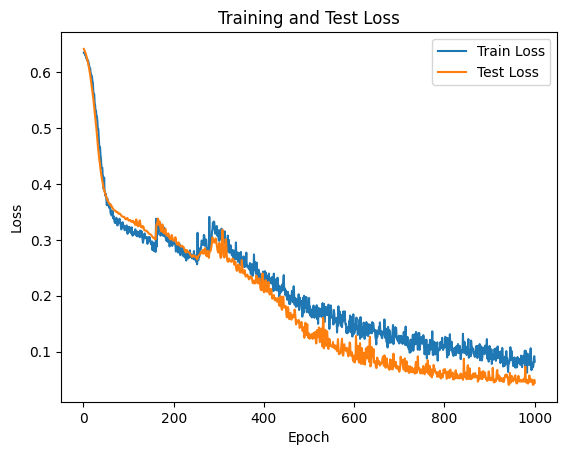

In [13]:
bench_train_losses = []
bench_test_losses = []

epochs = 1000

for epoch in range(epochs):
    bench_model.train()
    bench_optimizer.zero_grad()
    bench_outputs = bench_model(bench_X_train)
    loss = bench_criterion(bench_outputs, bench_y_train)
    loss.backward()
    bench_optimizer.step()
    bench_train_losses.append(loss.item())
    
    bench_model.eval()
    with torch.no_grad():
        bench_test_outputs = bench_model(bench_X_test)
        bench_test_loss = bench_criterion(bench_test_outputs, bench_y_test)
        bench_test_losses.append(bench_test_loss.item())

plt.plot(range(1, epochs+1), bench_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), bench_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [14]:
bench_model.eval()
with torch.no_grad():
    test_outputs = bench_model(bench_X_test)
    test_loss = bench_criterion(test_outputs, bench_y_test)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.04435794800519943


In [17]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = bench_X_test[sample_index]  # 입력 데이터
    target_sample = bench_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    bench_model.eval()
    with torch.no_grad():
        prediction = bench_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 0.3179,  0.3038,  0.4711,  1.0000,  0.3071,  0.3031,  0.5278,  1.0000,
         0.3087,  0.3038,  0.5278,  1.0000,  0.3102,  0.3047,  0.5276,  1.0000,
         0.2993,  0.3047,  0.4848,  1.0000,  0.2959,  0.3065,  0.4847,  1.0000,
         0.2923,  0.3088,  0.4846,  1.0000,  0.3120,  0.3182,  0.7329,  1.0000,
         0.2876,  0.3250,  0.5397,  1.0000,  0.3328,  0.3119,  0.5462,  1.0000,
         0.3270,  0.3130,  0.4893,  1.0000,  0.4535,  0.3443,  0.7954,  1.0000,
         0.3080,  0.3665,  0.3657,  1.0000,  0.5954,  0.3631,  0.8200,  0.4401,
         0.2575,  0.4051, -0.0720,  0.9903,  0.6399,  0.2903,  0.6974,  0.6307,
         0.2436,  0.3381, -0.3529,  0.9885,  0.6486,  0.2752,  0.6897,  0.5819,
         0.2432,  0.3306, -0.4133,  0.9628,  0.6277,  0.2647,  0.6417,  0.5923,
         0.2487,  0.3257, -0.3453,  0.9550,  0.6234,  0.2694,  0.6665,  0.6047,
         0.2510,  0.3284, -0.3322,  0.9453,  0.6970,  0.4062,  0.1216,  1.0000,
         0.5732,  0.4213, 

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_70819/658835650.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [20]:
bench_model.eval()
with torch.no_grad():
    predicted_probs = bench_model(bench_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(bench_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(bench_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(bench_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(bench_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.971
정밀도: 0.991
재현율: 0.971
F1 점수: 0.981


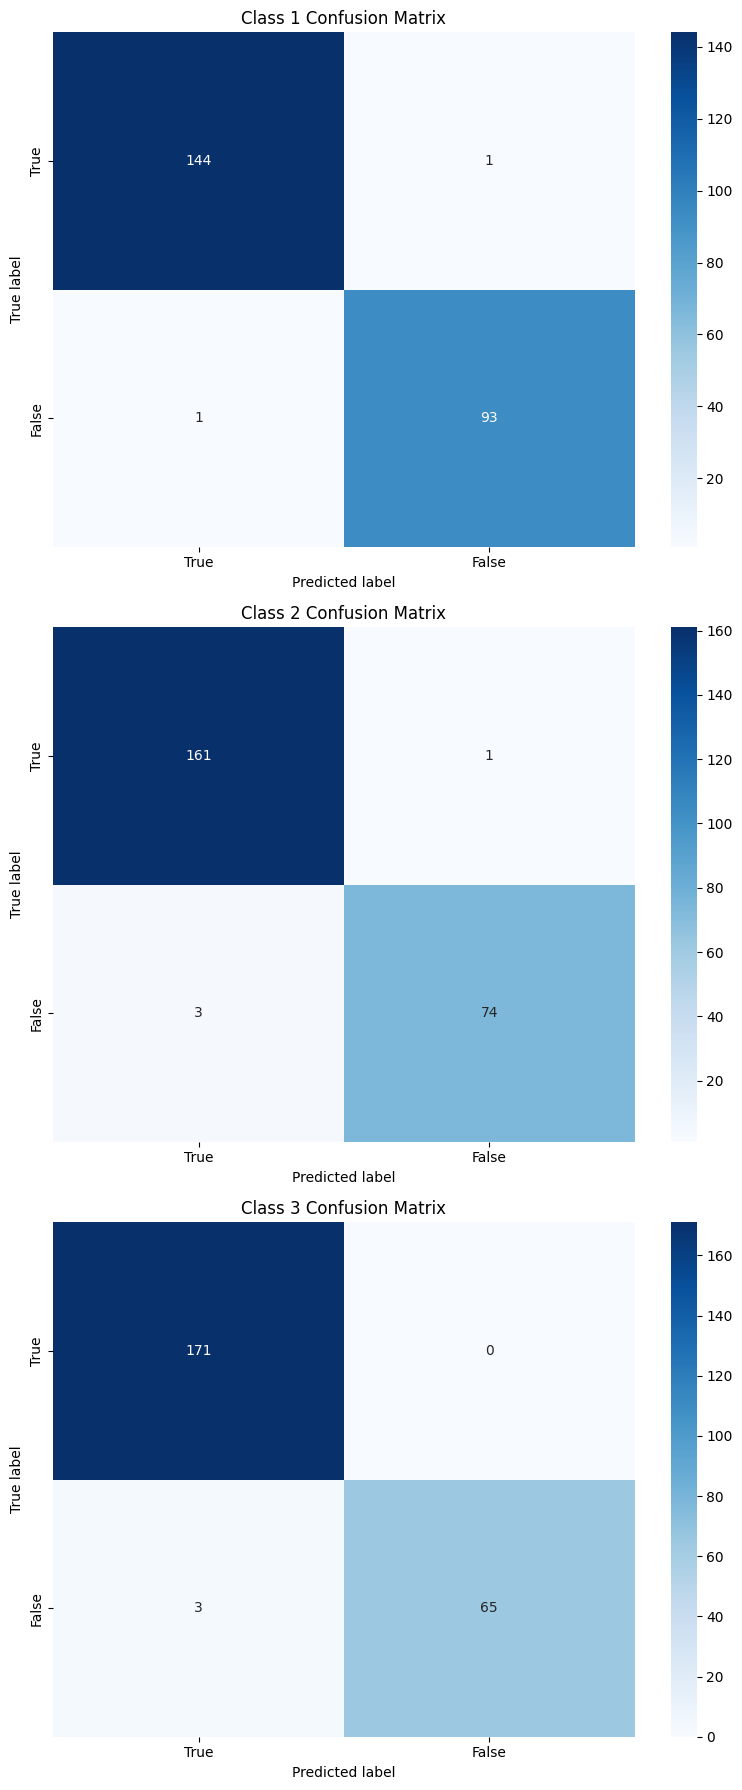

In [23]:
confusion_matrix = multilabel_confusion_matrix(bench_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

### Squat

In [24]:
# 모델 생성
input_size = 132
output_size = 4
squat_model = DeepClassifier(input_size, output_size)
squat_criterion = nn.BCELoss()
squat_optimizer = optim.Adam(squat_model.parameters(), lr=0.001)

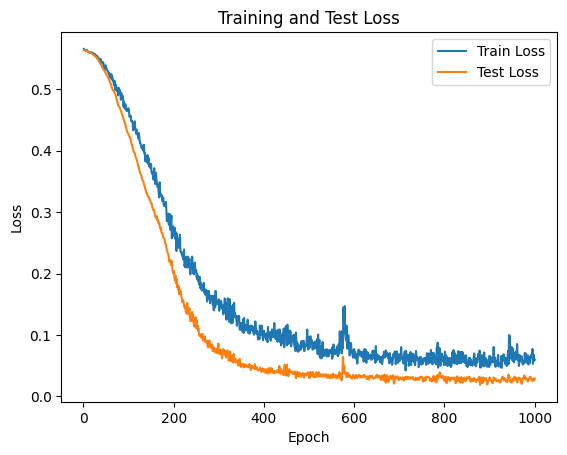

In [26]:
squat_train_losses = []
squat_test_losses = []

epochs = 1000

for epoch in range(epochs):
    squat_model.train()
    squat_optimizer.zero_grad()
    squat_outputs = squat_model(squat_X_train)
    squat_loss = squat_criterion(squat_outputs, squat_y_train)
    squat_loss.backward()
    squat_optimizer.step()
    squat_train_losses.append(squat_loss.item())
    
    squat_model.eval()
    with torch.no_grad():
        squat_test_outputs = squat_model(squat_X_test)
        squat_test_loss = squat_criterion(squat_test_outputs, squat_y_test)
        squat_test_losses.append(squat_test_loss.item())

plt.plot(range(1, epochs+1), squat_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), squat_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [27]:
squat_model.eval()
with torch.no_grad():
    squat_test_outputs = squat_model(squat_X_test)
    squat_test_loss = squat_criterion(squat_test_outputs, squat_y_test)
    print(f'Test Loss: {squat_test_loss.item()}')

Test Loss: 0.029156075790524483


In [28]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = squat_X_test[sample_index]  # 입력 데이터
    target_sample = squat_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    squat_model.eval()
    with torch.no_grad():
        prediction = squat_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 4.5236e-01,  4.1871e-01, -2.8348e-01,  9.9989e-01,  4.6158e-01,
         4.0100e-01, -3.2731e-01,  9.9993e-01,  4.6837e-01,  3.9995e-01,
        -3.2711e-01,  9.9994e-01,  4.7580e-01,  3.9887e-01, -3.2720e-01,
         9.9995e-01,  4.5358e-01,  4.0017e-01, -2.4828e-01,  9.9991e-01,
         4.5428e-01,  3.9869e-01, -2.4842e-01,  9.9991e-01,  4.5534e-01,
         3.9724e-01, -2.4840e-01,  9.9990e-01,  5.3008e-01,  3.9589e-01,
        -4.0778e-01,  9.9994e-01,  5.0782e-01,  3.9474e-01, -5.4810e-02,
         9.9989e-01,  4.8539e-01,  4.3890e-01, -3.1249e-01,  9.9994e-01,
         4.7454e-01,  4.3796e-01, -2.1157e-01,  9.9987e-01,  6.9924e-01,
         4.6894e-01, -5.1376e-01,  9.9987e-01,  5.6583e-01,  4.5387e-01,
         1.0450e-01,  9.9867e-01,  6.2982e-01,  6.0557e-01, -4.3128e-01,
         9.4870e-01,  4.8136e-01,  5.0404e-01,  4.4024e-02,  2.4518e-01,
         4.9365e-01,  4.8623e-01, -4.8336e-03,  9.4117e-01,  4.6622e-01,
         4.7132e-01, -8.9472e-02,  2.

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_70819/3174289499.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [29]:
squat_model.eval()
with torch.no_grad():
    predicted_probs = squat_model(squat_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(squat_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(squat_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(squat_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(squat_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.974
정밀도: 0.991
재현율: 0.974
F1 점수: 0.983


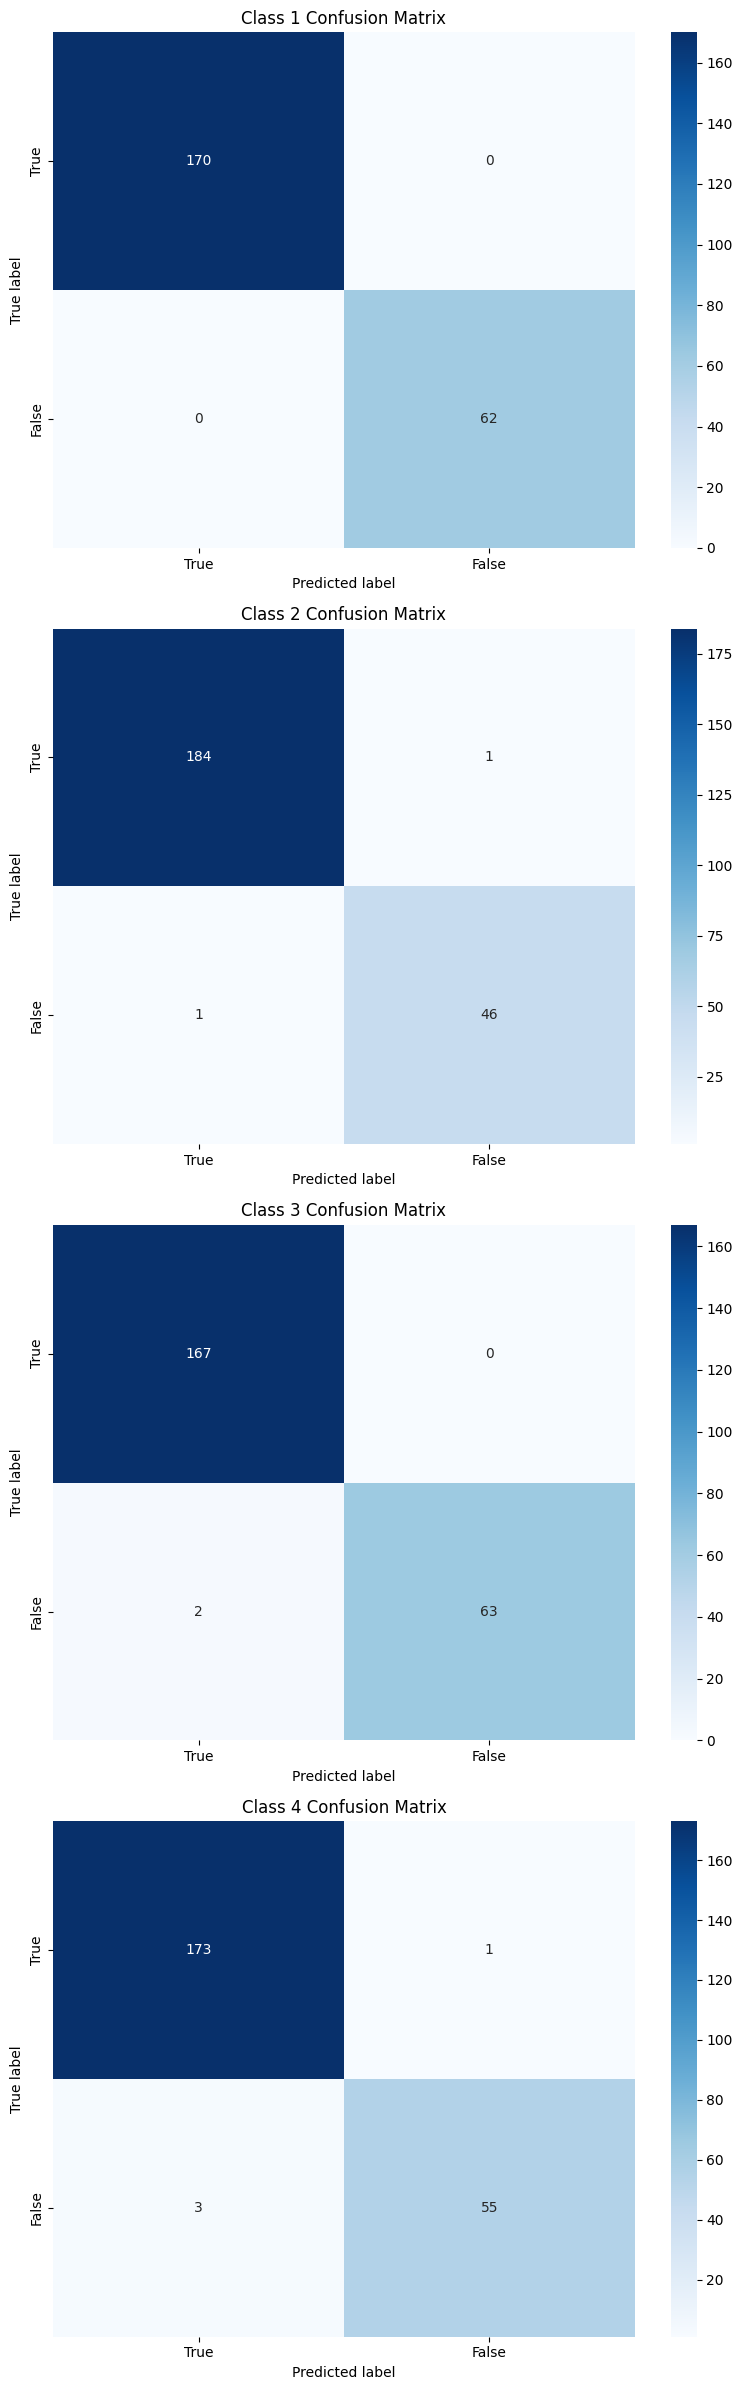

In [30]:
confusion_matrix = multilabel_confusion_matrix(squat_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

### Deadlift

In [49]:
# 모델 생성
input_size = 132
output_size = 4
deadlift_model = DeepClassifier(input_size, output_size)
deadlift_criterion = nn.BCELoss()
deadlift_optimizer = optim.Adam(deadlift_model.parameters(), lr=0.001)

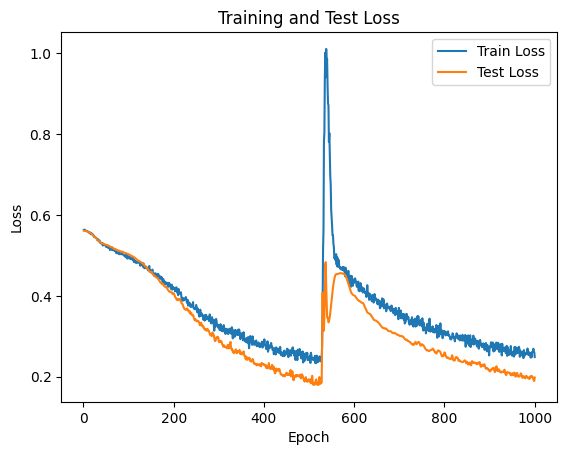

In [50]:
deadlift_train_losses = []
deadlift_test_losses = []

epochs = 1000

for epoch in range(epochs):
    deadlift_model.train()
    deadlift_optimizer.zero_grad()
    deadlift_outputs = deadlift_model(deadlift_X_train)
    deadlift_loss = deadlift_criterion(deadlift_outputs, deadlift_y_train)
    deadlift_loss.backward()
    deadlift_optimizer.step()
    deadlift_train_losses.append(deadlift_loss.item())
    
    deadlift_model.eval()
    with torch.no_grad():
        deadlift_test_outputs = deadlift_model(deadlift_X_test)
        deadlift_test_loss = deadlift_criterion(deadlift_test_outputs, deadlift_y_test)
        deadlift_test_losses.append(deadlift_test_loss.item())

plt.plot(range(1, epochs+1), deadlift_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), deadlift_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [51]:
deadlift_model.eval()
with torch.no_grad():
    deadlift_test_outputs = deadlift_model(deadlift_X_test)
    deadlift_test_loss = deadlift_criterion(deadlift_test_outputs, deadlift_y_test)
    print(f'Test Loss: {deadlift_test_loss.item()}')

Test Loss: 0.19785548746585846


In [52]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = deadlift_X_test[sample_index]  # 입력 데이터
    target_sample = deadlift_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    deadlift_model.eval()
    with torch.no_grad():
        prediction = deadlift_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 0.5574,  0.4807, -0.3261,  0.9990,  0.5749,  0.4843, -0.3330,  0.9986,
         0.5777,  0.4837, -0.3333,  0.9983,  0.5810,  0.4831, -0.3335,  0.9990,
         0.5730,  0.4835, -0.3924,  0.9986,  0.5739,  0.4825, -0.3926,  0.9982,
         0.5747,  0.4814, -0.3928,  0.9988,  0.5972,  0.4709, -0.3080,  0.9984,
         0.5830,  0.4686, -0.5380,  0.9984,  0.5535,  0.4713, -0.2864,  0.9993,
         0.5527,  0.4707, -0.3612,  0.9993,  0.5941,  0.4338, -0.1175,  0.9999,
         0.5056,  0.4281, -0.5914,  1.0000,  0.5647,  0.5094,  0.0765,  0.5164,
         0.4207,  0.5100, -0.5872,  0.9899,  0.5431,  0.5712,  0.1024,  0.5888,
         0.3721,  0.5984, -0.5637,  0.9771,  0.5462,  0.5862,  0.1129,  0.4901,
         0.3594,  0.6157, -0.6323,  0.9580,  0.5470,  0.5868,  0.0440,  0.5120,
         0.3727,  0.6179, -0.6314,  0.9601,  0.5434,  0.5818,  0.0761,  0.5016,
         0.3828,  0.6102, -0.5643,  0.9393,  0.3857,  0.4611,  0.1571,  0.9995,
         0.3227,  0.4492, 

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_70819/2186968047.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [53]:
deadlift_model.eval()
with torch.no_grad():
    predicted_probs = deadlift_model(deadlift_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(deadlift_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(deadlift_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(deadlift_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(deadlift_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.463
정밀도: 0.985
재현율: 0.463
F1 점수: 0.630


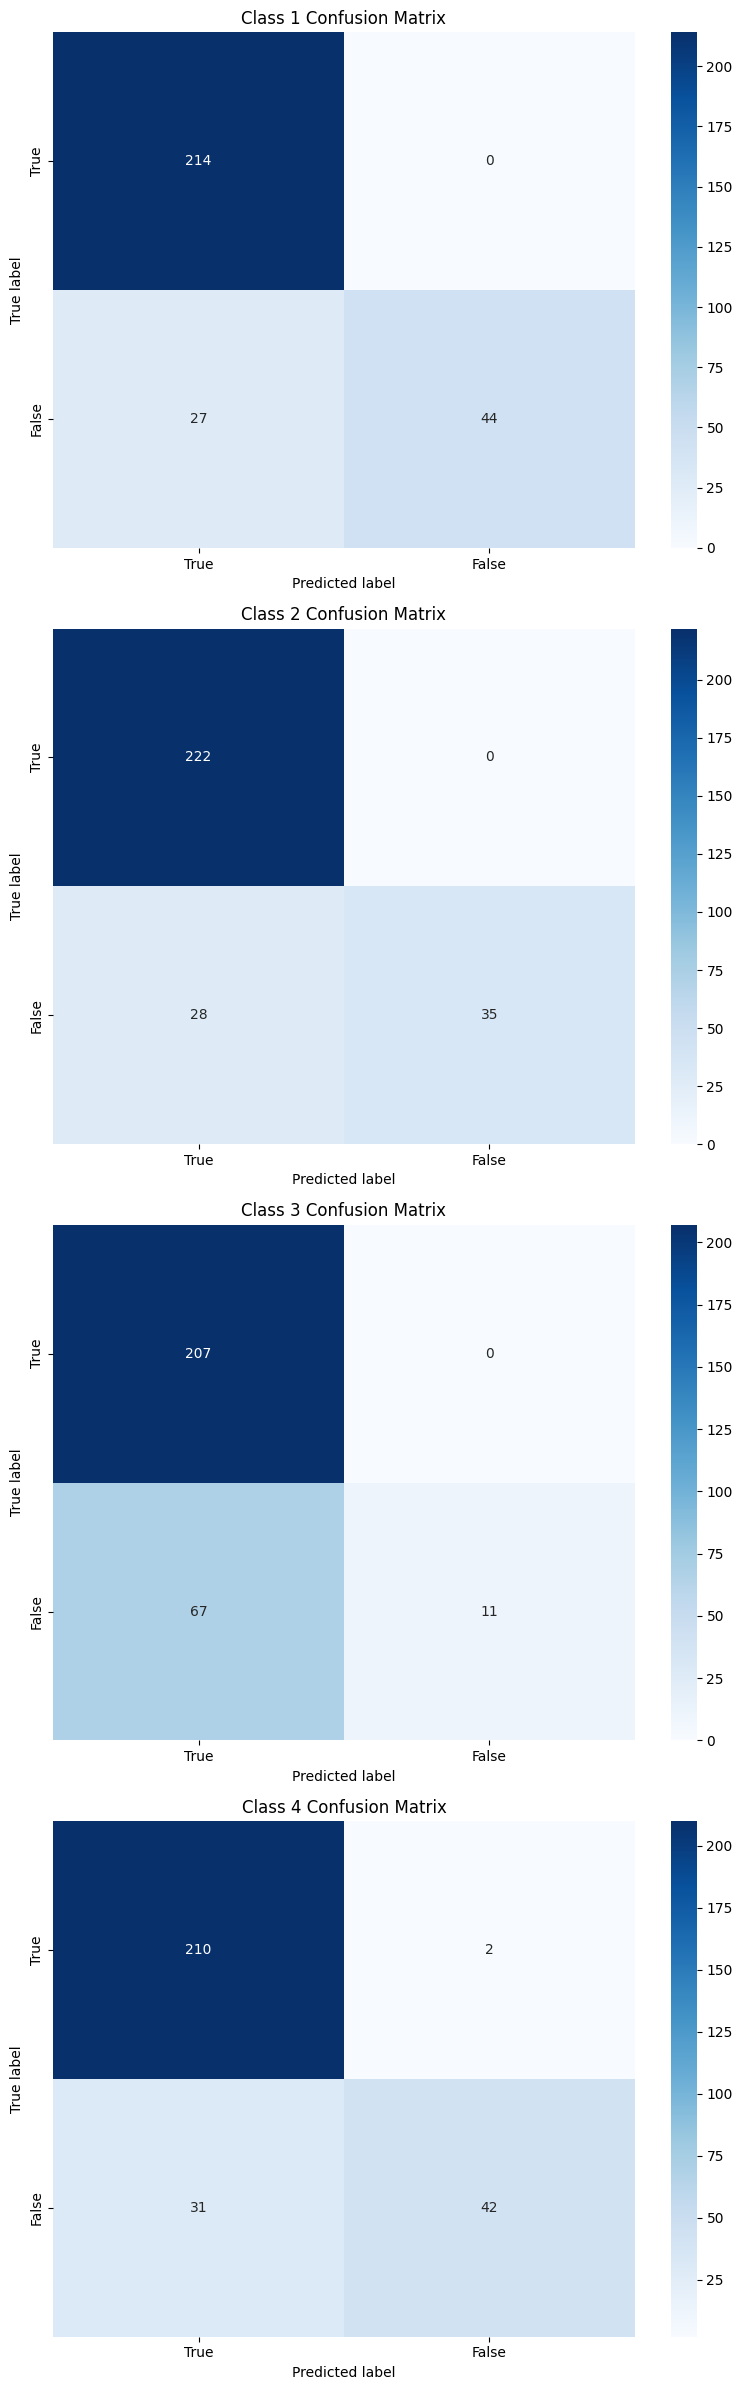

In [54]:
confusion_matrix = multilabel_confusion_matrix(deadlift_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

# Save models

In [55]:
import pickle

# Bench Press
with open('benchpress_model_deep_merged.pkl', 'wb') as f:
    pickle.dump(bench_model, f)

# Squat
with open('squat_model_deep_merged.pkl', 'wb') as f:
    pickle.dump(squat_model, f)

# Deadlift
with open('deadlift_model_deep_merged.pkl', 'wb') as f:
    pickle.dump(deadlift_model, f)

In [56]:
bench_X_test.shape

torch.Size([239, 132])

In [57]:
squat_X_test.shape

torch.Size([232, 132])

In [58]:
deadlift_X_test.shape

torch.Size([285, 132])